## Programming Exercise 1: Linear Regression

<a href='#normal_eq'>Link to the destination</a>

#### Warmup Excercise : Return the 5x5 identity matrix 

In [1]:
import numpy as np

In [2]:
def WarmUpExercise():
    return np.matrix(np.identity(5, dtype=int))  # the np.matrix is not recommended

In [3]:
A=WarmUpExercise()

In [4]:
A

matrix([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

In [5]:
# use np.eye, by default get the same identity square matrix
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [6]:
# non-squred matrix
np.eye(5,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
# move diagnal one row up
np.eye(5,5,1)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [8]:
# move diagnal one row down
np.eye(5,3,-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

##  Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

#### Load Data

The file ex1data1.txt contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [9]:
data = np.loadtxt('ex1data1.txt',delimiter=',')

In [10]:
# data1 will be an 97 * 2 array
print ('data.shape=',data.shape)
X = data[:,0]
Y = data[:,1]

data.shape= (97, 2)


In [11]:
import pandas as pd

In [12]:
# pandas dataframe
data1 = pd.read_csv('ex1data1.txt', names=['Population','Profit'])

In [13]:
print ('data11.shape=',data1.shape)
X1 = data1['Population'] # or X1 = data1.iloc[:,0]
Y1 = data1['Profit'] # or Y1 = data1.iloc[:,1]

data11.shape= (97, 2)


In [14]:
# sample data
data1[0:5]

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Plotting Data

In [15]:
# auto reload modules
%reload_ext autoreload
%autoreload 2
#!pip install --user matplotlib

In [16]:
# https://matplotlib.org/users/pyplot_tutorial.html
import matplotlib.pyplot as plt

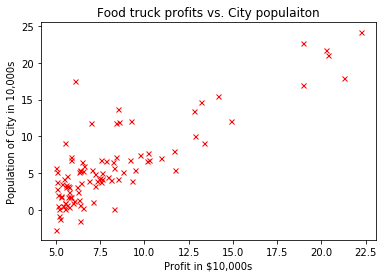

In [17]:
plt.plot(X,Y, 'rx', markersize=5) # plot data
plt.xlabel('Profit in $10,000s')  # x-axis label
plt.ylabel('Population of City in 10,000s') # y-axis label
plt.title('Food truck profits vs. City populaiton') # figure title
plt.show()

### Gradient Descent

- __Goal__: Fit the linear regression parameters $\theta$ to the above dataset using gradient descent <br>

- __Update Euqations__: The objective of linear regression is to minimize the cost function: 
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model: $$h_\theta(x)=\theta^Tx=\theta_0 + \theta_1x_1$$ <br>
so we can calculate the partial derivative of $J(\theta)$ as:
$$\frac{\partial}{\partial\theta_0}J(\theta)=\frac{\partial}{\partial\theta_0}\left[\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})^2\right]=\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})$$
$$\frac{\partial}{\partial\theta_1}J(\theta)=\frac{\partial}{\partial\theta_1}\left[\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})^2\right]=\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})x^{(i)}_1$$ <br>

- __Batch gradient descent__: in each iteration, perform the update:
$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)$$
where
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x^{(i)}_j$$
Note, $x^{(i)}_0=1$

* __Prepare dataset__

In [18]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html
m = len(data[:,0])
x0 = np.ones(m)
x1 = data[:,0] 
X = np.column_stack((x0,x1))  # add x0=1 to X

In [19]:
y = data[:,1]

* __computing the cost $J(\theta)$__

In [20]:
def computeCost(X, y, theta):
    m = len(y)
    yy = np.dot(X,theta)
    diff = yy - y
    cost = np.sum(np.square(diff)) / (2*m)
    return cost

In [21]:
# compute and display initial cost
J = computeCost(X, y, [0,0])
print('With theta = {0} Cost computed = {1:.2f}'.format([0,0],J))

With theta = [0, 0] Cost computed = 32.07


In [22]:
J = computeCost(X, y, [-1, 2])
print('With theta = {0} Cost computed = {1:.2f}'.format([-1, 2],J))

With theta = [-1, 2] Cost computed = 54.24


- __Run Gradient descent__

In [23]:
def compute_descent(X, y, theta):
    m = len(X)
    yy = np.dot(X, theta)
    diff = yy - y
    # apply diff dot product over each column of X
    descent = np.tensordot(X, diff, axes=[0,0])
    return descent / m

In [24]:
# use numpy tensordot to calculate summation along given axis
# same as np.matmul([10,20,30],[[1,2],[3,4],[5,6]])
np.tensordot([[1,2],[3,4],[5,6]], [10,20,30], axes=[0,0])

array([220, 280])

In [25]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    cur_iter = 0
    while cur_iter < num_iters:        
        J_history[cur_iter] = computeCost(X, y, theta)
        descent = compute_descent(X, y, theta)
        theta = theta - alpha * descent
        cur_iter += 1
    return theta, J_history

In [26]:
# run gradient descent with given initial setting
theta = np.zeros(2)
iterations = 1500
alpha = 0.01
fit_theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)

In [27]:
print('Theta found by gradient descent: {0}'.format(fit_theta))

Theta found by gradient descent: [-3.63029144  1.16636235]


In [28]:
#Predict values for population sizes of 35,000 and 70,000
predict_x = np.array([[1, 3.5],[1, 7]])
predict_y = np.dot(predict_x, fit_theta)

In [29]:
print('For poplulation = {0}, predict profit={1}'.format(predict_x[:,1]*10000, predict_y * 10000))

For poplulation = [35000. 70000.], predict profit=[ 4519.7678677  45342.45012945]


- __Plot linear fitting result__

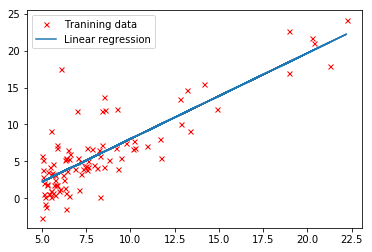

In [30]:
train_dot, = plt.plot(X[:,1], y, 'rx', markersize=5) # plot data
fit_line, = plt.plot(X[:,1], np.dot(X, fit_theta))
#predict_dot = plt.plot(predict_x[:,1], predict_y, 'go', markersize=10)
plt.legend([train_dot, fit_line],['Tranining data', 'Linear regression'])
plt.show()

### Visualizing Cost Function $J(\theta)$

In [31]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

- Prepare theta grid and calculate cost function

In [32]:
xv,yv = np.meshgrid(theta0_vals, theta1_vals) # get the grid index

In [33]:
grid_theta = np.dstack((xv,yv)) # stack theta0 and theta1, along the 3rd index

In [34]:
calc_cost = lambda theta : computeCost(X, y, theta)
J_vals = np.apply_along_axis(calc_cost, 2, grid_theta) # apply along 3rd index

- Visualize $J(\theta)$ in 3D space

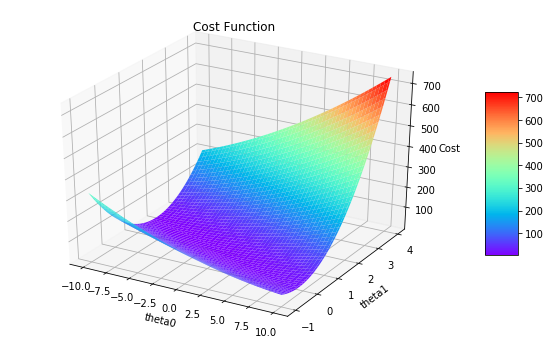

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.figure(figsize=[10,6])
ax = plt.subplot(projection='3d')
surf = ax.plot_surface(X=xv,Y=yv,Z=J_vals, cmap=cm.rainbow)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

- Visualize in contour

In [36]:
#https://stackoverflow.com/questions/44498631/continuous-colorbar-with-contour-levels
def generate_filled_colormap(cont):
    # generate a filled colorbar with the same colormap used by contour
    from matplotlib import colors
    norm = colors.Normalize(vmin=cont.cvalues.min(), vmax=cont.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cont.cmap)
    sm.set_array([])
    return sm    

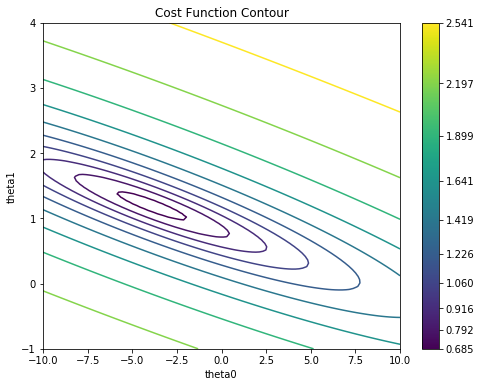

In [37]:
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
fig, ax = plt.subplots(figsize=[8,6])
cont = ax.contour(theta0_vals,theta1_vals,np.log10(J_vals), levels=np.logspace(-2,3,80))
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_title('Cost Function Contour')
sm = generate_filled_colormap(cont)
fig.colorbar(sm, ticks=cont.levels)
# ax.clabel(cont, inline=1, fontsize=10)  # draw text label
# fig.colorbar(cont)  # this is a line styple colorbar
plt.show()

### Visualize Gradient Descent Algorithm

- Record data druing gradient descent

In [79]:
# run with history record
def gradientDescent_hist(X, y, theta, alpha, num_iters):
    record_hist = np.zeros((num_iters, len(theta)+1)) # cost + theta
    cur_iter = 0
    while cur_iter < num_iters: 
        record_hist[cur_iter, 1:] = theta
        record_hist[cur_iter, 0] = computeCost(X, y, theta)
        descent = compute_descent(X, y, theta)
        theta = theta - alpha * descent
        cur_iter += 1
    return theta, record_hist

- __Run with different initial $\theta$__

In [170]:
alpha = 0.01
iterations=1500
init_thetas = np.array([[0,0],[10, 3.9],[-8,-0.9],[5,3], [-10,4],[10,-1]])
runs_data = []
for init_theta in init_thetas:    
    fit, hist = gradientDescent_hist(X, y, init_theta, alpha, iterations)
    print ('Run_{2} with theta={0} \t fitting result is {1}'.format(init_theta, fit, len(runs_data)+1))
    runs_data.append((fit, hist))

Run_1 with theta=[0. 0.] 	 fitting result is [-3.63029144  1.16636235]
Run_2 with theta=[10.   3.9] 	 fitting result is [-2.99505518  1.10254598]
Run_3 with theta=[-8.  -0.9] 	 fitting result is [-4.15322538  1.21889674]
Run_4 with theta=[5. 3.] 	 fitting result is [-3.31964727  1.13515477]
Run_5 with theta=[-10.   4.] 	 fitting result is [-4.31799842  1.23544998]
Run_6 with theta=[10. -1.] 	 fitting result is [-2.96251005  1.09927647]


In [171]:
def plot_rundata(runs_data, ax1, ax2, labels=[]):
    run_num = 0
    for run_fit,run_hist in runs_data:
        run_num += 1
        label = 'Run_{0}'.format(run_num)
        if labels:
            label += labels[run_num-1]
            
        theta0_hist = run_hist[:,1]
        theta1_hist = run_hist[:,2]
        hist_plt = ax1.plot(theta0_hist, theta1_hist, '-', label=label)
        run_color = hist_plt[0].get_color()
        fit_plt = ax1.plot(run_fit[0], run_fit[1], '*', color=run_color, markersize=10)
        #ax1.legend()

        # cost function over iterations    
        cost_hist = run_hist[:,0]
        cost_plt = ax2.plot(range(len(cost_hist)), cost_hist, color=run_color,label=label)
        ax2.set_yscale('log')
        ax2.legend()

    ax1.set_xlabel('theta0')
    ax1.set_ylabel('theta1')
    ax1.set_title('Theta move in cost function contour')
    ax2.set_title('Cost over iterations')
    ax2.set_xlabel('Fitting Iterations')
    ax2.set_ylabel('Cost')    

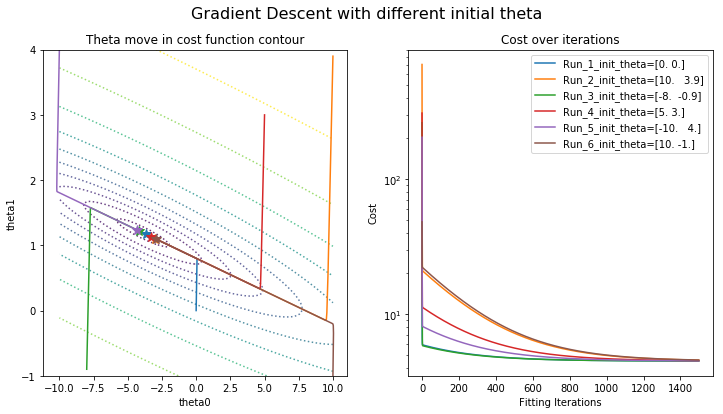

In [172]:
# Illustrate how the fitting algorithm work
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])
cont = ax1.contour(theta0_vals,theta1_vals,np.log10(J_vals), levels=np.logspace(-2,3,80), linestyles='dotted',alpha=0.8)
run_labels = ['_init_theta={0}'.format(x) for x in init_thetas]
plot_rundata(runs_data, ax1, ax2, run_labels)
plt.suptitle('Gradient Descent with different initial theta', fontsize=16)
plt.show()

#### Conclusion: 
- With proper $\alpha$ and iterations, the fitting can converage to the local minimum no matter what the value of initial theta

### Run with different Learning Rate $\alpha$

- if alpha is too big, the gradientDescent could not converage. 
- If the cost is increased for N iterations, just stop  

In [173]:
# if alpha is not choo
def gradientDescent_hist_earlystop(X, y, theta, alpha, num_iters, stop_niter=1):
    record_hist = np.zeros((num_iters, len(theta)+1)) # cost + theta
    cur_iter = 0
    n_cost_increased = 0
    while cur_iter < num_iters: 
        record_hist[cur_iter, 1:] = theta
        record_hist[cur_iter, 0] = computeCost(X, y, theta)
        if cur_iter > 0 and record_hist[cur_iter,0] > record_hist[cur_iter-1, 0]:
            n_cost_increased += 1
            if n_cost_increased > stop_niter:
                break
        else:
            n_cost_increased = 0        
        descent = compute_descent(X, y, theta)
        theta = theta - alpha * descent
        cur_iter += 1
    return theta, record_hist, cur_iter

In [174]:
runs_data = []
init_alpha = 0.01
init_iter = 1500
init_theta = [10,-1]
run_params = [[init_alpha, init_iter],[init_alpha*0.5, init_iter],[init_alpha*0.2, init_iter],\
              [init_alpha*2, init_iter],[init_alpha*2.3, init_iter], [init_alpha*2.5, init_iter], \
              #[init_alpha*5, init_iter],[init_alpha*10, init_iter] \
             ]
for param in run_params:
    fit, hist, niter = gradientDescent_hist_earlystop(X, y, init_theta, param[0], int(param[1]))
    print ('Run_{4} with theta={0}, alpha={1:.4f}, iterations={2} => fitting result is {3}'.format(init_theta, param[0], niter, fit, len(runs_data)+1))
    runs_data.append((fit, hist))

Run_1 with theta=[10, -1], alpha=0.0100, iterations=1500 => fitting result is [-2.96251005  1.09927647]
Run_2 with theta=[10, -1], alpha=0.0050, iterations=1500 => fitting result is [-0.28213447  0.83000367]
Run_3 with theta=[10, -1], alpha=0.0020, iterations=1500 => fitting result is [4.24102402 0.37560333]
Run_4 with theta=[10, -1], alpha=0.0200, iterations=1500 => fitting result is [-3.83376006  1.18680298]
Run_5 with theta=[10, -1], alpha=0.0230, iterations=1500 => fitting result is [-3.86830946  1.19027384]
Run_6 with theta=[10, -1], alpha=0.0250, iterations=2 => fitting result is [ 9.86526812 -1.07754752]


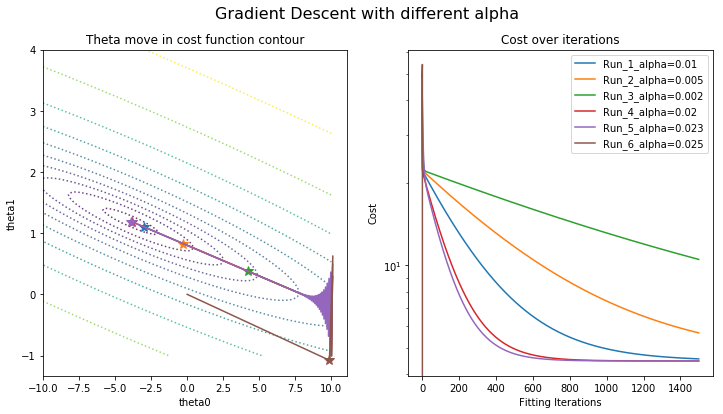

In [175]:
# Illustrate how the fitting algorithm work
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])
cont = ax1.contour(theta0_vals,theta1_vals,np.log10(J_vals), levels=np.logspace(-2,3,80), linestyles='dotted',alpha=0.8)
run_labels = ['_alpha={0}'.format(x[0]) for x in run_params]
plot_rundata(runs_data, ax1, ax2, run_labels)
plt.suptitle('Gradient Descent with different alpha', fontsize=16)
plt.show()

#### Conclusion: 
- If $\alpha$ is too small, the fitting may be not able to converage to the local minimum within the given iterations (e.g. Run3)
- If $\alpha$ is too big, the fitting could never converge (e.g. Run6)

## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.


### Feature Normalization

The file ex1data2.txt contains a training set of housing prices in Portland,
Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# Load data
data2 = pd.read_csv('ex1data2.txt', names=['size','bedroom','price'])
print ('\nFirst 5 examples from the dataset:')
data2[0:5]


First 5 examples from the dataset:


,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [129]:
X = data2.iloc[:,0:2]
Y = data2.iloc[:,[2]]

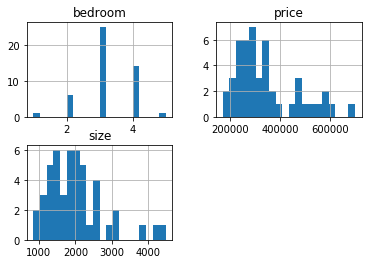

In [130]:
# plot data histgram
hist = data2.hist(bins=20)

In [131]:
# The standard deviation is a way of measuring how much variation there is
#in the range of values of a particular feature (most data points will lie within
# ±2 standard deviations of the mean)
def featureNormalize(X):
    mu = X.mean()
    sigma = X.std()
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [132]:
X_norm, mu, sigma = featureNormalize(X)

print ('\nFirst 10 examples after normalization:')
print('Size(mu={0}, sigma={1})'.format(mu[0], sigma[0]))
print('Bedroom(mu={0}, sigma={1})'.format(mu[1], sigma[1]))

X_norm[0:10]


First 10 examples after normalization:
Size(mu=2000.6808510638298, sigma=794.7023535338897)
Bedroom(mu=3.1702127659574466, sigma=0.7609818867800999)


,size,bedroom
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417
5,-0.019732,1.090417
6,-0.587240,-0.223675
7,-0.721881,-0.223675
8,-0.781023,-0.223675
9,-0.637573,-0.223675


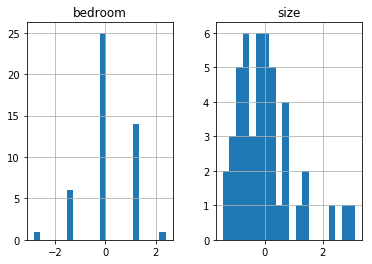

In [133]:
norm_hist = X_norm.hist(bins=20)

### Gradient Descent

In the multivariate case, the cost fucntion can also be written in the following vectorized form: $$J(\theta)=\frac{1}{2m}(X\theta-\overrightarrow{y})^T(X\theta-\overrightarrow{y})$$
<br>when running gradient descent, $\theta$ is updated as:
$$\theta := \theta - \alpha\frac{1}{m}X^T(X\theta-\overrightarrow{y})$$

In [134]:
# J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
# parameter for linear regression to fit the data points in X and y
def computeCostMulti(X, y, theta):    
    m = y.shape[0]  # length of training examples
    diff = X.dot(theta) - y  # dataframe substract apply the same column name
    J = diff.T.dot(diff)
    J = J / (2 * m)
    return np.asscalar(J)

In [135]:
def computeDiscentMulti(X, y, theta):
    m = len(y)
    diff = X.dot(theta) - y
    disc = X.T.dot(diff)
    return disc / m

In [136]:
#GRADIENTDESCENTMULTI Performs gradient descent to learn theta
#   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
#   taking num_iters gradient steps with learning rate alpha
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # record of cost, theta from each iteration
    J_history = pd.DataFrame(np.zeros((num_iters,len(theta)+1)))
    
    cur_iter = 0
    while cur_iter < num_iters:
        cost = computeCostMulti(X, y, theta)        
        J_history.iloc[cur_iter, 0] = cost
        J_history.iloc[cur_iter, 1:] = theta.T
       
        disc = computeDiscentMulti(X, y, theta)        
        theta = theta - alpha * disc
        cur_iter += 1
    return theta, J_history

In [137]:
# add bias column to X
X_norm['_bias'] = 1
X=X_norm.values # convert dataframe to np array
y=Y.values

In [138]:
X_norm[0:4]

,size,bedroom,_bias
0,0.130010,-0.223675,1
1,-0.504190,-0.223675,1
2,0.502476,-0.223675,1
3,-0.735723,-1.537767,1


In [139]:
# Init theta and params to run gradient descent
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))

In [140]:
# Running gradient descent
theta, J_hist = gradientDescentMulti(X, y, theta, alpha, num_iters)

In [141]:
J_hist.columns=['Cost','theta1','theta2','theta0']
J_hist.index.name='Iterations'

In [142]:
J_hist[0:5]

,Cost,theta1,theta2,theta0
Iterations,,,,
0,6.559155e+10,0.000000,0.000000,0.000000
1,6.430075e+10,1046.329338,541.236838,3404.126596
2,6.303679e+10,2079.451740,1071.442026,6774.211926
3,6.179911e+10,3099.556927,1590.795913,10110.596402
4,6.058714e+10,4106.831771,2099.476044,13413.617034


In [143]:
print('Theta computed from gradient descent:{0}'.format(theta.T))

Theta computed from gradient descent:[[100087.11600585   3673.54845093 334302.06399328]]


#### Plot the convergence graph

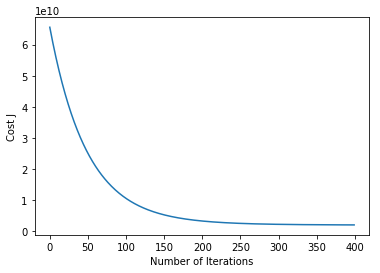

In [144]:
fig, ax = plt.subplots()
ax.plot(J_hist.index, J_hist['Cost'])
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost J')
plt.show()

#### Estimate new price

In [145]:
def normalize(x, mu, sigma):
    return (x-mu)/sigma

In [146]:
new_samples=np.array([[1650,3],[500,1],[2500,2],[2800,4],[3900,5]])
X_pred = normalize(new_samples,mu.values,sigma.values)
X_pred = np.append(X_pred, np.ones((X_pred.shape[0],1)), axis=1)
y_pred = np.dot(X_pred, theta)

In [147]:
for i in range(len(y_pred)):
    print('Predicted price of a {0:4} sq-ft, {1} br house={2:.2f}'.format(
        new_samples[i][0],new_samples[i][1], y_pred[i][0]))

Predicted price of a 1650 sq-ft, 3 br house=289314.62
Predicted price of a  500 sq-ft, 1 br house=134825.53
Predicted price of a 2500 sq-ft, 2 br house=391538.70
Predicted price of a 2800 sq-ft, 4 br house=438976.33
Predicted price of a 3900 sq-ft, 5 br house=582340.90


### Visualize Training Examples

In [148]:
data2['bedroom'].unique()

array([3, 2, 4, 5, 1])

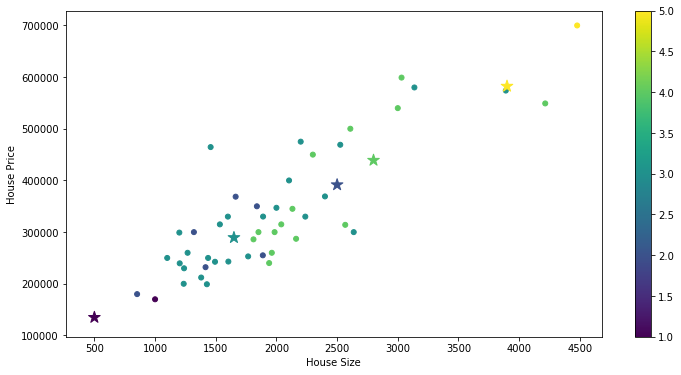

In [149]:
fig, ax = plt.subplots(figsize=[12,6])

all_colors = ['r','g','b','y','m']
all_markers = ['o','x','v','*','>']
_colors = data2['bedroom'].apply(lambda x:all_colors[x-1])
_markers = data2['bedroom'].apply(lambda x:all_markers[x-1])
_new_colors = [all_colors[x-1] for x in new_samples[:,1]]
 
sct1 = ax.scatter(data2['size'], data2['price'], s=25, c=data2['bedroom'])
sct2 = ax.scatter(new_samples[:,0], y_pred[:,0], s=150, c=new_samples[:,1], marker='*')
ax.set_xlabel('House Size')
ax.set_ylabel('House Price')
fig.colorbar(sct1)
plt.show()

### Select Learning Rate

In [150]:
# Add early stop condition in 
def gradientDescentMulti_earlystop(X, y, theta, alpha, max_num_iters, min_cost): 
    cur_iter = 0
    last_cost = -1    
    while cur_iter < max_num_iters:
        cost = computeCostMulti(X, y, theta)        
        # Stop if cost increased
        if last_cost >= 0 and last_cost < cost:
            break
        if cost < min_cost:
            print('Cost={0} < {1}'.format(cost, min_cost))
            break
        last_cost = cost
        disc = computeDiscentMulti(X, y, theta)        
        theta = theta - alpha * disc
        cur_iter += 1
    return theta, cost, cur_iter

In [151]:
alpha = 2.0
max_iter = int(1e5)
min_cost = 1.0
theta = np.zeros((3,1))

optimum_cost = 2043280050
result = []
while alpha > 1e-4:
    _theta, _cost, _iter = gradientDescentMulti_earlystop(X, y, theta, alpha, max_iter,min_cost)
    #print ('Run with alpha={0}, iter={1}, cost_diff={2}'.format(alpha, _iter, _cost-optimum_cost))
    result.append([alpha,_iter,_cost,_theta])
    alpha = alpha * 0.8

In [152]:
result2 = np.zeros((len(result), 6))
for i in range(0, len(result)):
    result2[i,0:3] = result[i][0:3]
    result2[i,3:] = result[i][3].flatten().tolist()

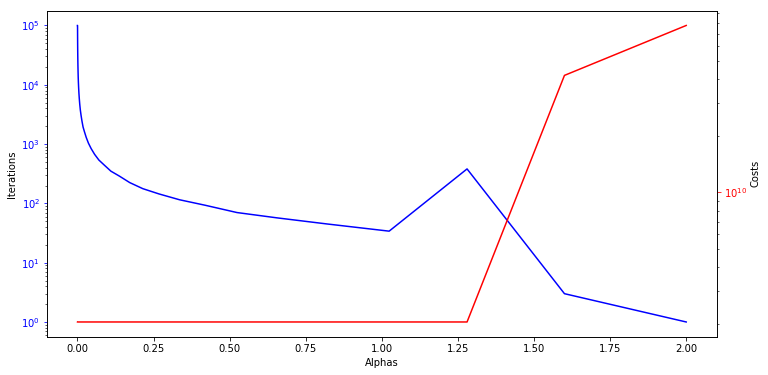

In [153]:
fig, ax1 = plt.subplots(figsize=[12,6])
alphas = result2[:,0]
iters = result2[:,1]
costs = result2[:,2]

ax1.semilogy(alphas, iters, 'b')
#ax1.set_yscale('log')
ax1.set_xlabel('Alphas')
ax1.set_ylabel('Iterations')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.semilogy(alphas, costs,'r')
#ax2.set_yscale('log')
ax2.set_ylabel('Costs')
ax2.tick_params('y', colors='r')

plt.show()

In [154]:
result3 = pd.DataFrame(result2)
result3.columns=['alpha', 'Iterations','Cost','theta1','theta2','theta0']

In [155]:
# top 5 alphas
result3.sort_values(by=['Cost','Iterations'])[0:5]

,alpha,Iterations,Cost,theta1,theta2,theta0
3,1.024000,34.0,2.043280e+09,110631.049952,-6649.474295,340412.659574
4,0.819200,45.0,2.043280e+09,110631.050095,-6649.474087,340412.659574
5,0.655360,57.0,2.043280e+09,110631.049917,-6649.473909,340412.659574
7,0.419430,93.0,2.043280e+09,110631.049752,-6649.473744,340412.659574
8,0.335544,115.0,2.043280e+09,110631.049339,-6649.473331,340412.659574


#### Run with selected alpha

In [179]:
alpha = 1.024
num_iters = 50
theta = np.zeros((3,1))
theta_best, J_hist = gradientDescentMulti(X, y, theta, alpha, num_iters)

Theta computed from gradient descent:[[110631.05027881  -6649.47427082 340412.65957447]]


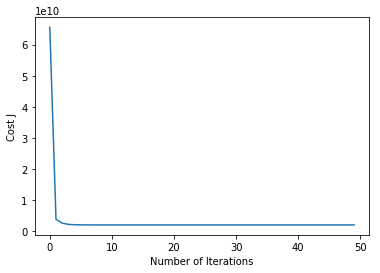

In [180]:
print('Theta computed from gradient descent:{0}'.format(theta_best.T))
fig, ax = plt.subplots()
ax.plot(J_hist.index, J_hist.iloc[:,0])
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost J')
#ax.set_yscale('log')
plt.show()

In [182]:
new_samples=np.array([[1650,3],[500,1],[2500,2],[2800,4],[3900,5]])
X_pred = normalize(new_samples,mu.values,sigma.values)
X_pred = np.append(X_pred, np.ones((X_pred.shape[0],1)), axis=1)
y_pred = np.dot(X_pred, theta_best)

In [183]:
for i in range(len(y_pred)):
    print('Predicted price of a {0:4} sq-ft, {1} br house={2:.2f}'.format(
        new_samples[i][0],new_samples[i][1], y_pred[i][0]))

Predicted price of a 1650 sq-ft, 3 br house=293081.46
Predicted price of a  500 sq-ft, 1 br house=150465.23
Predicted price of a 2500 sq-ft, 2 br house=420148.56
Predicted price of a 2800 sq-ft, 4 br house=444435.72
Predicted price of a 3900 sq-ft, 5 br house=588829.44


<a id='normal_eq'></a>
### Normal Equations

Use closed-form solution to linear regression as:
$$\theta=\left(X^TX\right)^{-1}X^T\overrightarrow{y}$$

In [187]:
XX = data2.iloc[:,0:2].values
yy = data2.iloc[:,[2]].values
XX = np.append(XX, np.ones((len(X), 1),dtype=np.int32), axis=1)

In [188]:
def normalEqn(X, y):
    inv = np.linalg.inv(X.T.dot(X))
    _tmp = inv.dot(X.T)
    theta = _tmp.dot(y)
    return theta

In [189]:
theta_eq = normalEqn(XX,yy)
print('Normal Equation: Theta={0}'.format(theta_eq.flatten()))

Normal Equation: Theta=[  139.21067402 -8738.01911233 89597.9095428 ]


In [190]:
new_samples=np.array([[1650,3],[500,1],[2500,2],[2800,4],[3900,5]])
XX_pred = new_samples
XX_pred = np.append(XX_pred, np.ones((X_pred.shape[0],1)), axis=1)
yy_pred = np.dot(XX_pred, theta_eq)

In [192]:
for i in range(len(y_pred)):
    print('Predicted price of a {0:4} sq-ft, {1} br house={2:.2f}'.format(
        XX_pred[i,0],XX_pred[i,1], yy_pred[i,0]))

Predicted price of a 1650.0 sq-ft, 3.0 br house=293081.46
Predicted price of a 500.0 sq-ft, 1.0 br house=150465.23
Predicted price of a 2500.0 sq-ft, 2.0 br house=420148.56
Predicted price of a 2800.0 sq-ft, 4.0 br house=444435.72
Predicted price of a 3900.0 sq-ft, 5.0 br house=588829.44


#### Reference
- Graphics with Matplotlib http://kestrel.nmt.edu/~raymond/software/python_notes/paper004.html
- Latex https://en.wikibooks.org/wiki/LaTeX/Mathematics